In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
cleaned_weather_data = 'C:/Users/kuohe/ClimateWins/02 Data/cleaned_weather_data.csv'
cleaned_weather_data = pd.read_csv(cleaned_weather_data)

In [3]:
pleasant_weather_data_path = 'C:/Users/kuohe/ClimateWins/02 Data/pleasant weather.csv'
pleasant_weather_data = pd.read_csv(pleasant_weather_data_path)

In [4]:
pleasant_weather_data

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,20221027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,20221028,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,20221029,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,20221030,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
pleasant_weather_data.drop(columns=['DATE'], inplace=True)

In [6]:
df= pd.concat([cleaned_weather_data, pleasant_weather_data], axis=1)

In [7]:
subset = df.sample(n=1000)

In [8]:
subset.shape

(1000, 150)

In [9]:
y = subset.iloc[:,-15:]

X = subset.iloc[:,:-15]

In [10]:
X.shape

(1000, 135)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train.shape

(700, 135)

In [13]:
clf = RandomForestClassifier(n_estimators = 100, max_depth=10)  

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [14]:
y_pred = clf.predict(X_test)

print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.5166666666666667


In [15]:
importance = clf.feature_importances_

In [16]:
clf.feature_importances_.shape

(135,)

In [17]:
importance = importance.reshape(-1,15,9)

In [18]:
importance

array([[[0.00239496, 0.00355494, 0.00265714, 0.00435217, 0.0114187 ,
         0.00685501, 0.01860657, 0.00691118, 0.02123776],
        [0.00313768, 0.00301227, 0.00336231, 0.00460948, 0.01140654,
         0.00413101, 0.01072444, 0.00363248, 0.00860858],
        [0.0021422 , 0.00244056, 0.00175339, 0.00274943, 0.01234724,
         0.00418298, 0.00753686, 0.00334936, 0.02247884],
        [0.00380633, 0.00358004, 0.00612734, 0.0042897 , 0.00931952,
         0.00439761, 0.02034495, 0.00275524, 0.04876575],
        [0.00462482, 0.00440826, 0.00269388, 0.00426443, 0.0120357 ,
         0.00807209, 0.02876369, 0.00341845, 0.0141931 ],
        [0.00254395, 0.00383172, 0.00372997, 0.00358896, 0.00771563,
         0.00350383, 0.02057359, 0.00268094, 0.01840362],
        [0.00254486, 0.0042131 , 0.004029  , 0.01037712, 0.00425171,
         0.00474074, 0.002918  , 0.00930896, 0.00275548],
        [0.00403135, 0.00332255, 0.00681072, 0.0137643 , 0.00411223,
         0.01819173, 0.00370287, 0.0179424

In [19]:
station_importances = np.sum(importance[0], axis=1)

In [20]:
station_importances

array([0.07798842, 0.05262479, 0.05898086, 0.10338648, 0.08247441,
       0.06657221, 0.04513898, 0.07792503, 0.11336406, 0.05800586,
       0.06992067, 0.06903611, 0.03742032, 0.05603207, 0.03112973])

In [21]:
pleasant_weather_data.columns[0].split("_")[0]

'BASEL'

In [22]:
c = pleasant_weather_data.columns

In [23]:
BASEL = c[0]

In [24]:
BASEL.split("_")

['BASEL', 'pleasant', 'weather']

In [25]:
split = BASEL.split("_")

In [26]:
split[0]

'BASEL'

In [27]:
pleasant_weather_data

,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22945,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22946,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
stations = [col.split("_")[0] for col in pleasant_weather_data.columns]

In [29]:
stations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

In [30]:
cleaned_weather_data.columns[0]

'BASEL_cloud_cover'

In [31]:
BASEL_columns = cleaned_weather_data.columns[:9]

In [32]:
BASEL_columns

Index(['BASEL_cloud_cover', 'BASEL_humidity', 'BASEL_pressure',
       'BASEL_global_radiation', 'BASEL_precipitation', 'BASEL_sunshine',
       'BASEL_temp_mean', 'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [33]:
BASEL_columns[0].replace('BASEL_', "")

'cloud_cover'

In [34]:
attributes = [col.replace('BASEL_', "") for col in BASEL_columns]

In [35]:
attributes

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

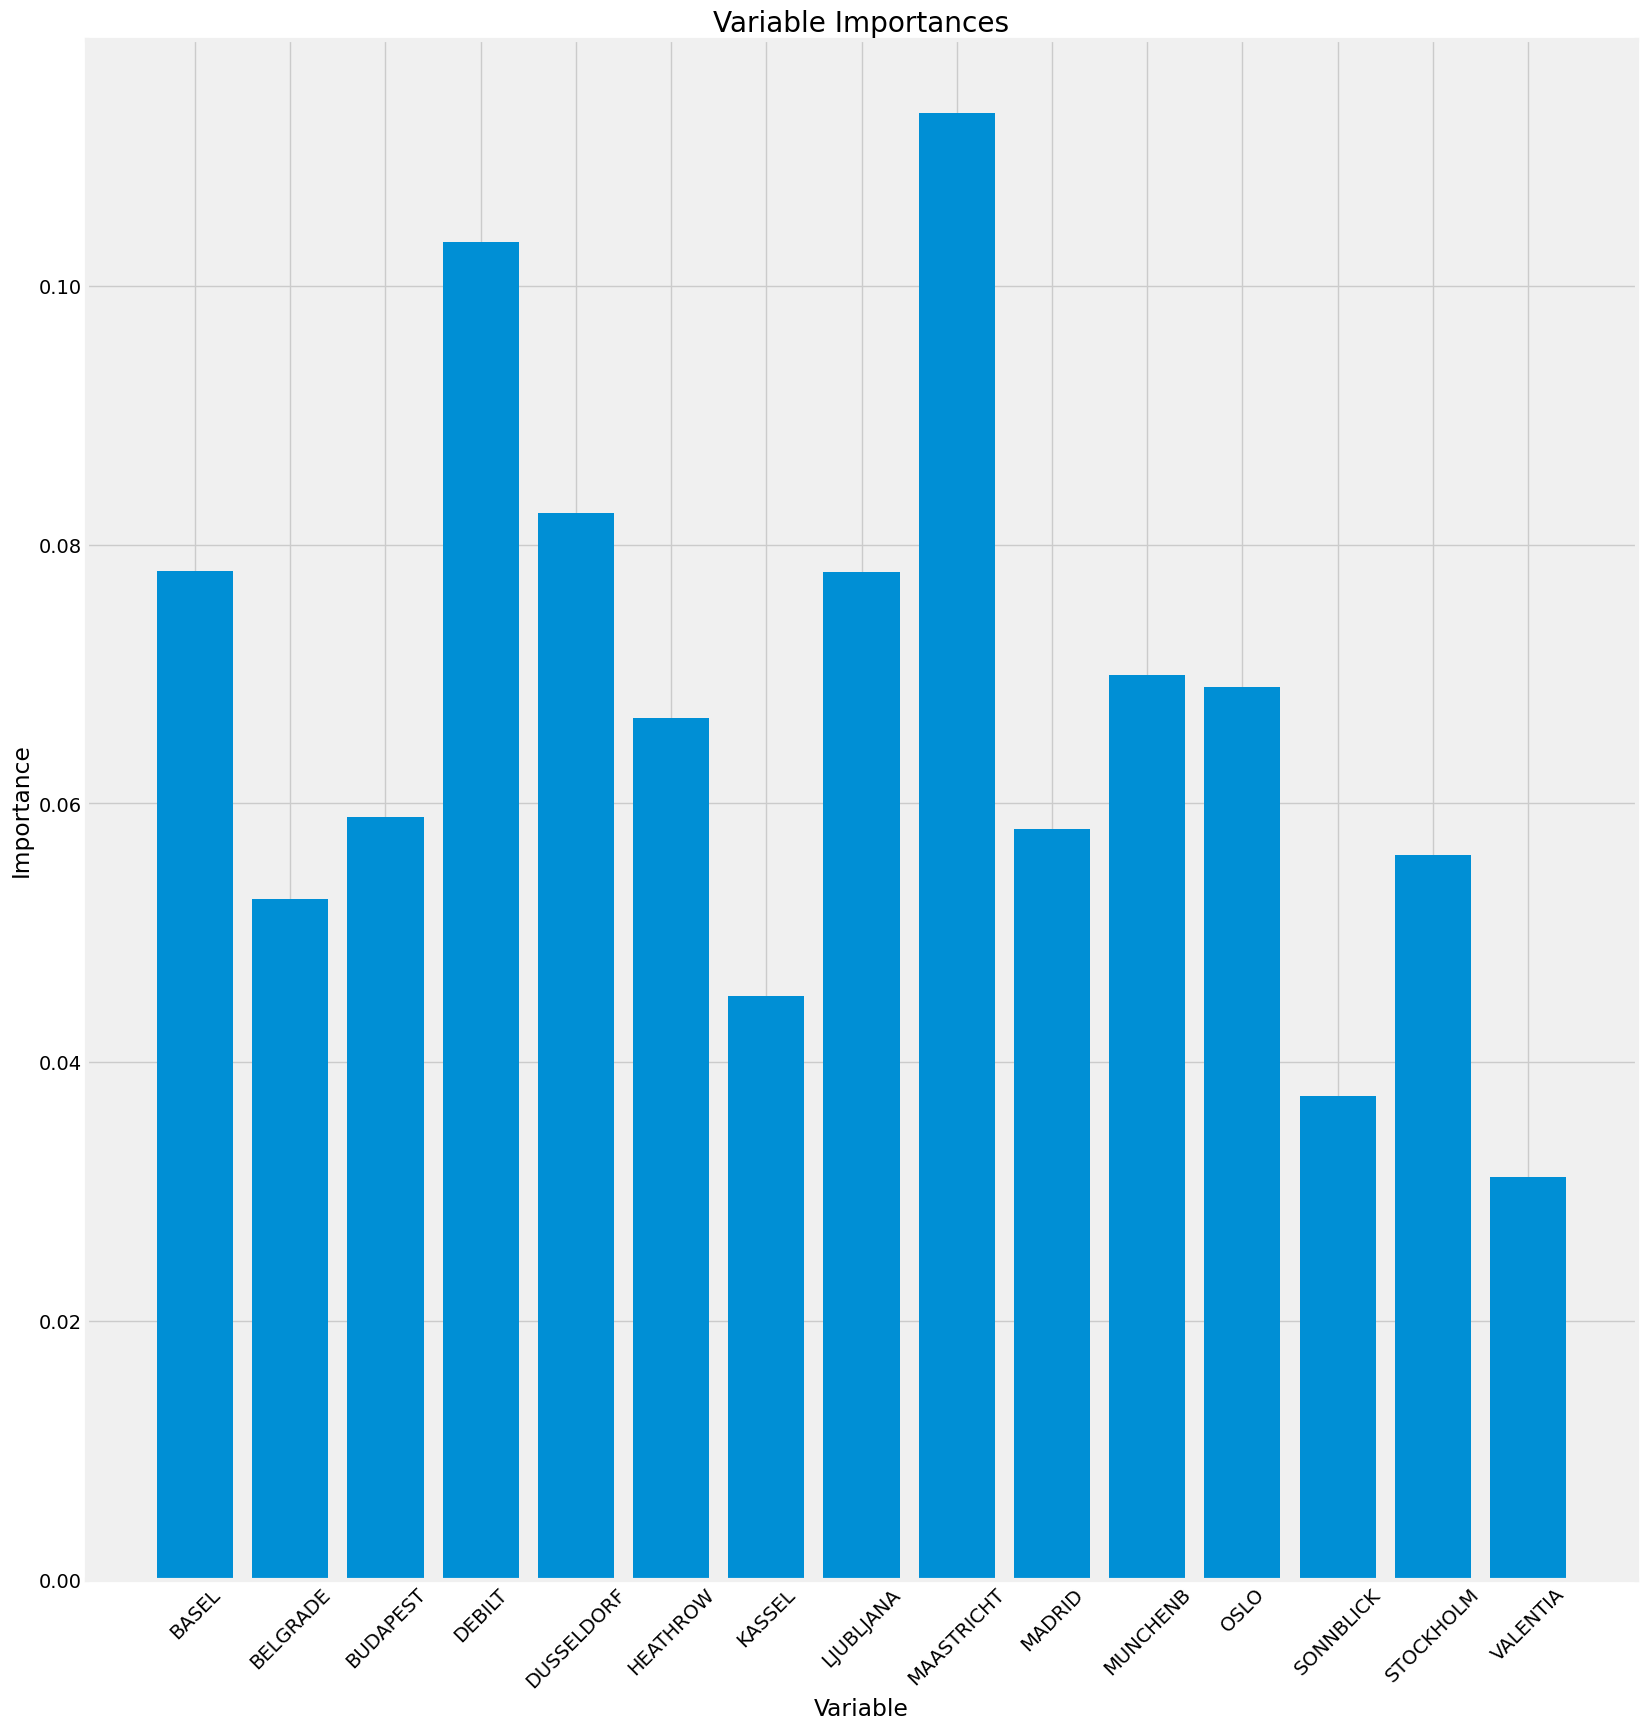

In [36]:
%matplotlib inline
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(station_importances)))

plt.bar(x_values, station_importances, orientation = 'vertical')
plt.xticks(x_values, stations, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [37]:
importance = clf.feature_importances_.reshape(-1, 15, 9)

station_importances = np.sum(importance[0], axis=1)

stations = [col.split("_")[0] for col in df.columns if '_pleasant_weather' in col]

# Identify the top three stations
top_stations_idx = np.argsort(station_importances)[-3:]
top_stations = [stations[i] for i in top_stations_idx]

print("Top 3 weather stations:", top_stations)

Top 3 weather stations: ['DUSSELDORF', 'DEBILT', 'MAASTRICHT']


In [38]:
#subset
for station in top_stations:
    station_columns = [col for col in df.columns if col.startswith(station)]
    if 'target' in df.columns:
        station_columns.append('target') 
    
    station_data = df[station_columns]
    
    X_station = station_data.iloc[:, :-1]
    y_station = station_data.iloc[:, -1]
    
    X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)
    
    clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    clf_station.fit(X_train_station, y_train_station)

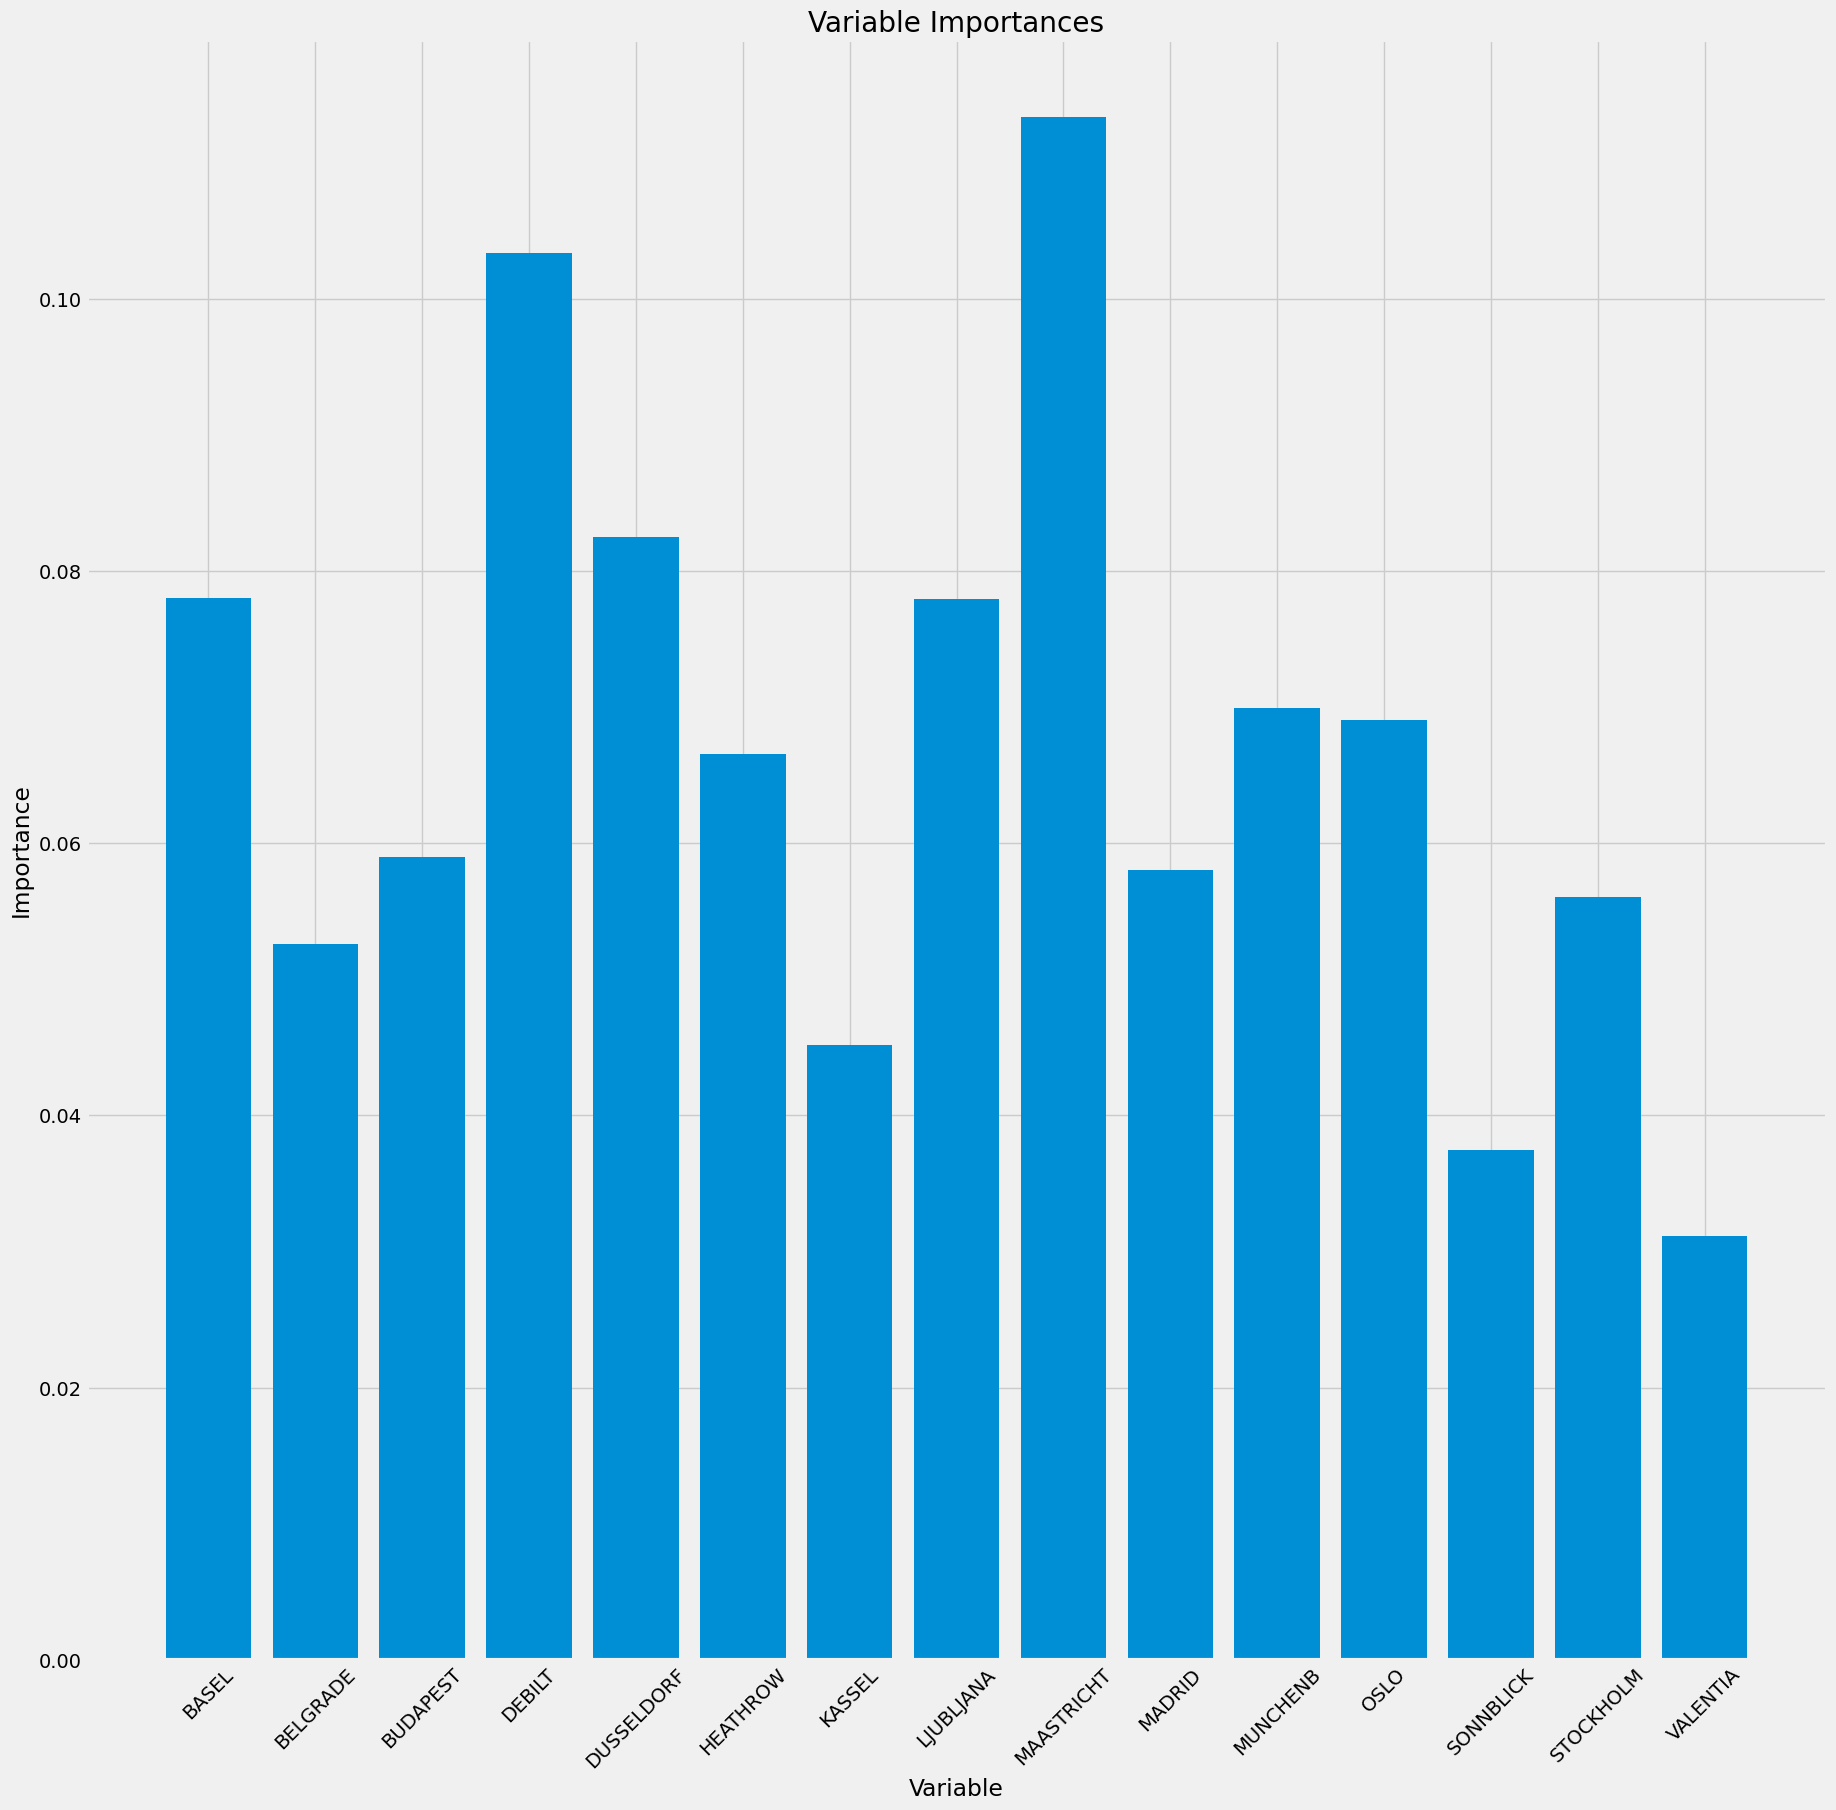

In [39]:
plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(station_importances)))

plt.bar(x_values, station_importances, orientation = 'vertical')
plt.xticks(x_values, stations, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

Model Accuracy for DUSSELDORF:  1.0


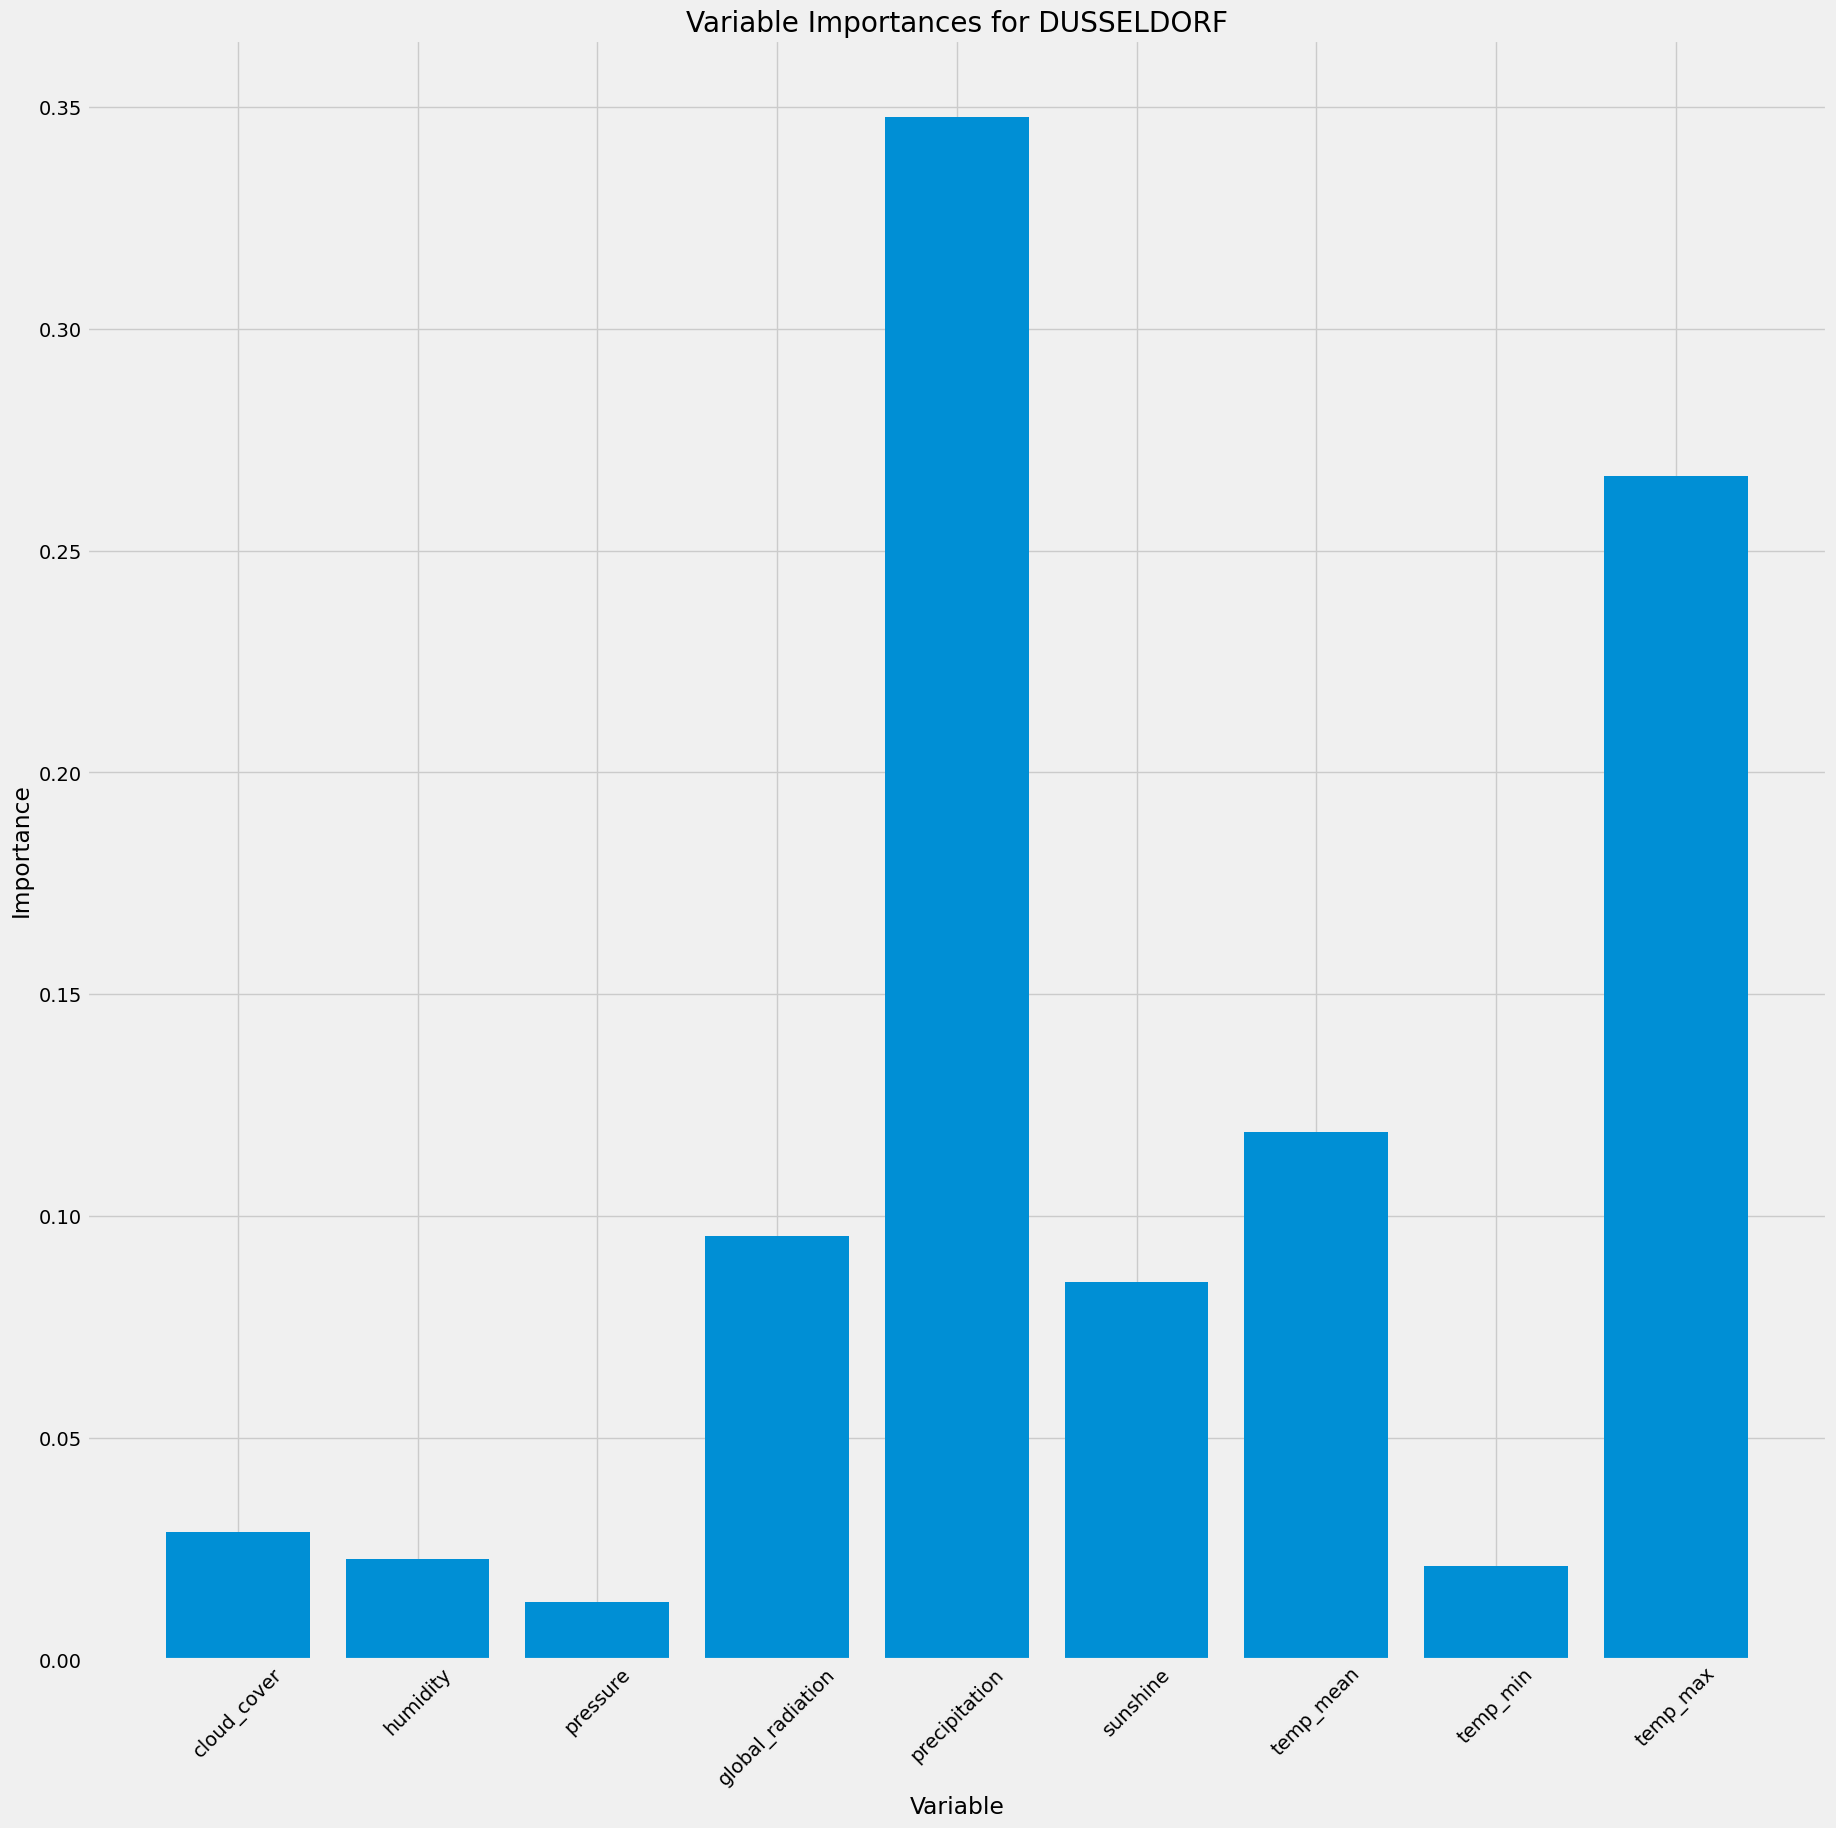

In [45]:
station = "DUSSELDORF"
station_columns = [col for col in df.columns if col.startswith(station)]
if 'target' in df.columns:
    station_columns.append('target')

station_data = df[station_columns]

X_station = station_data.iloc[:, :-1]
y_station = station_data.iloc[:, -1]

X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)

clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_station.fit(X_train_station, y_train_station)

plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(clf_station.feature_importances_)))

plt.bar(x_values, clf_station.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, attributes, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for DUSSELDORF');

#accuracy for the DUSSELDORF station model
y_pred_station = clf_station.predict(X_test_station)
print(f"Model Accuracy for {station}: ", metrics.accuracy_score(y_test_station, y_pred_station))

Model Accuracy for BASEL:  1.0


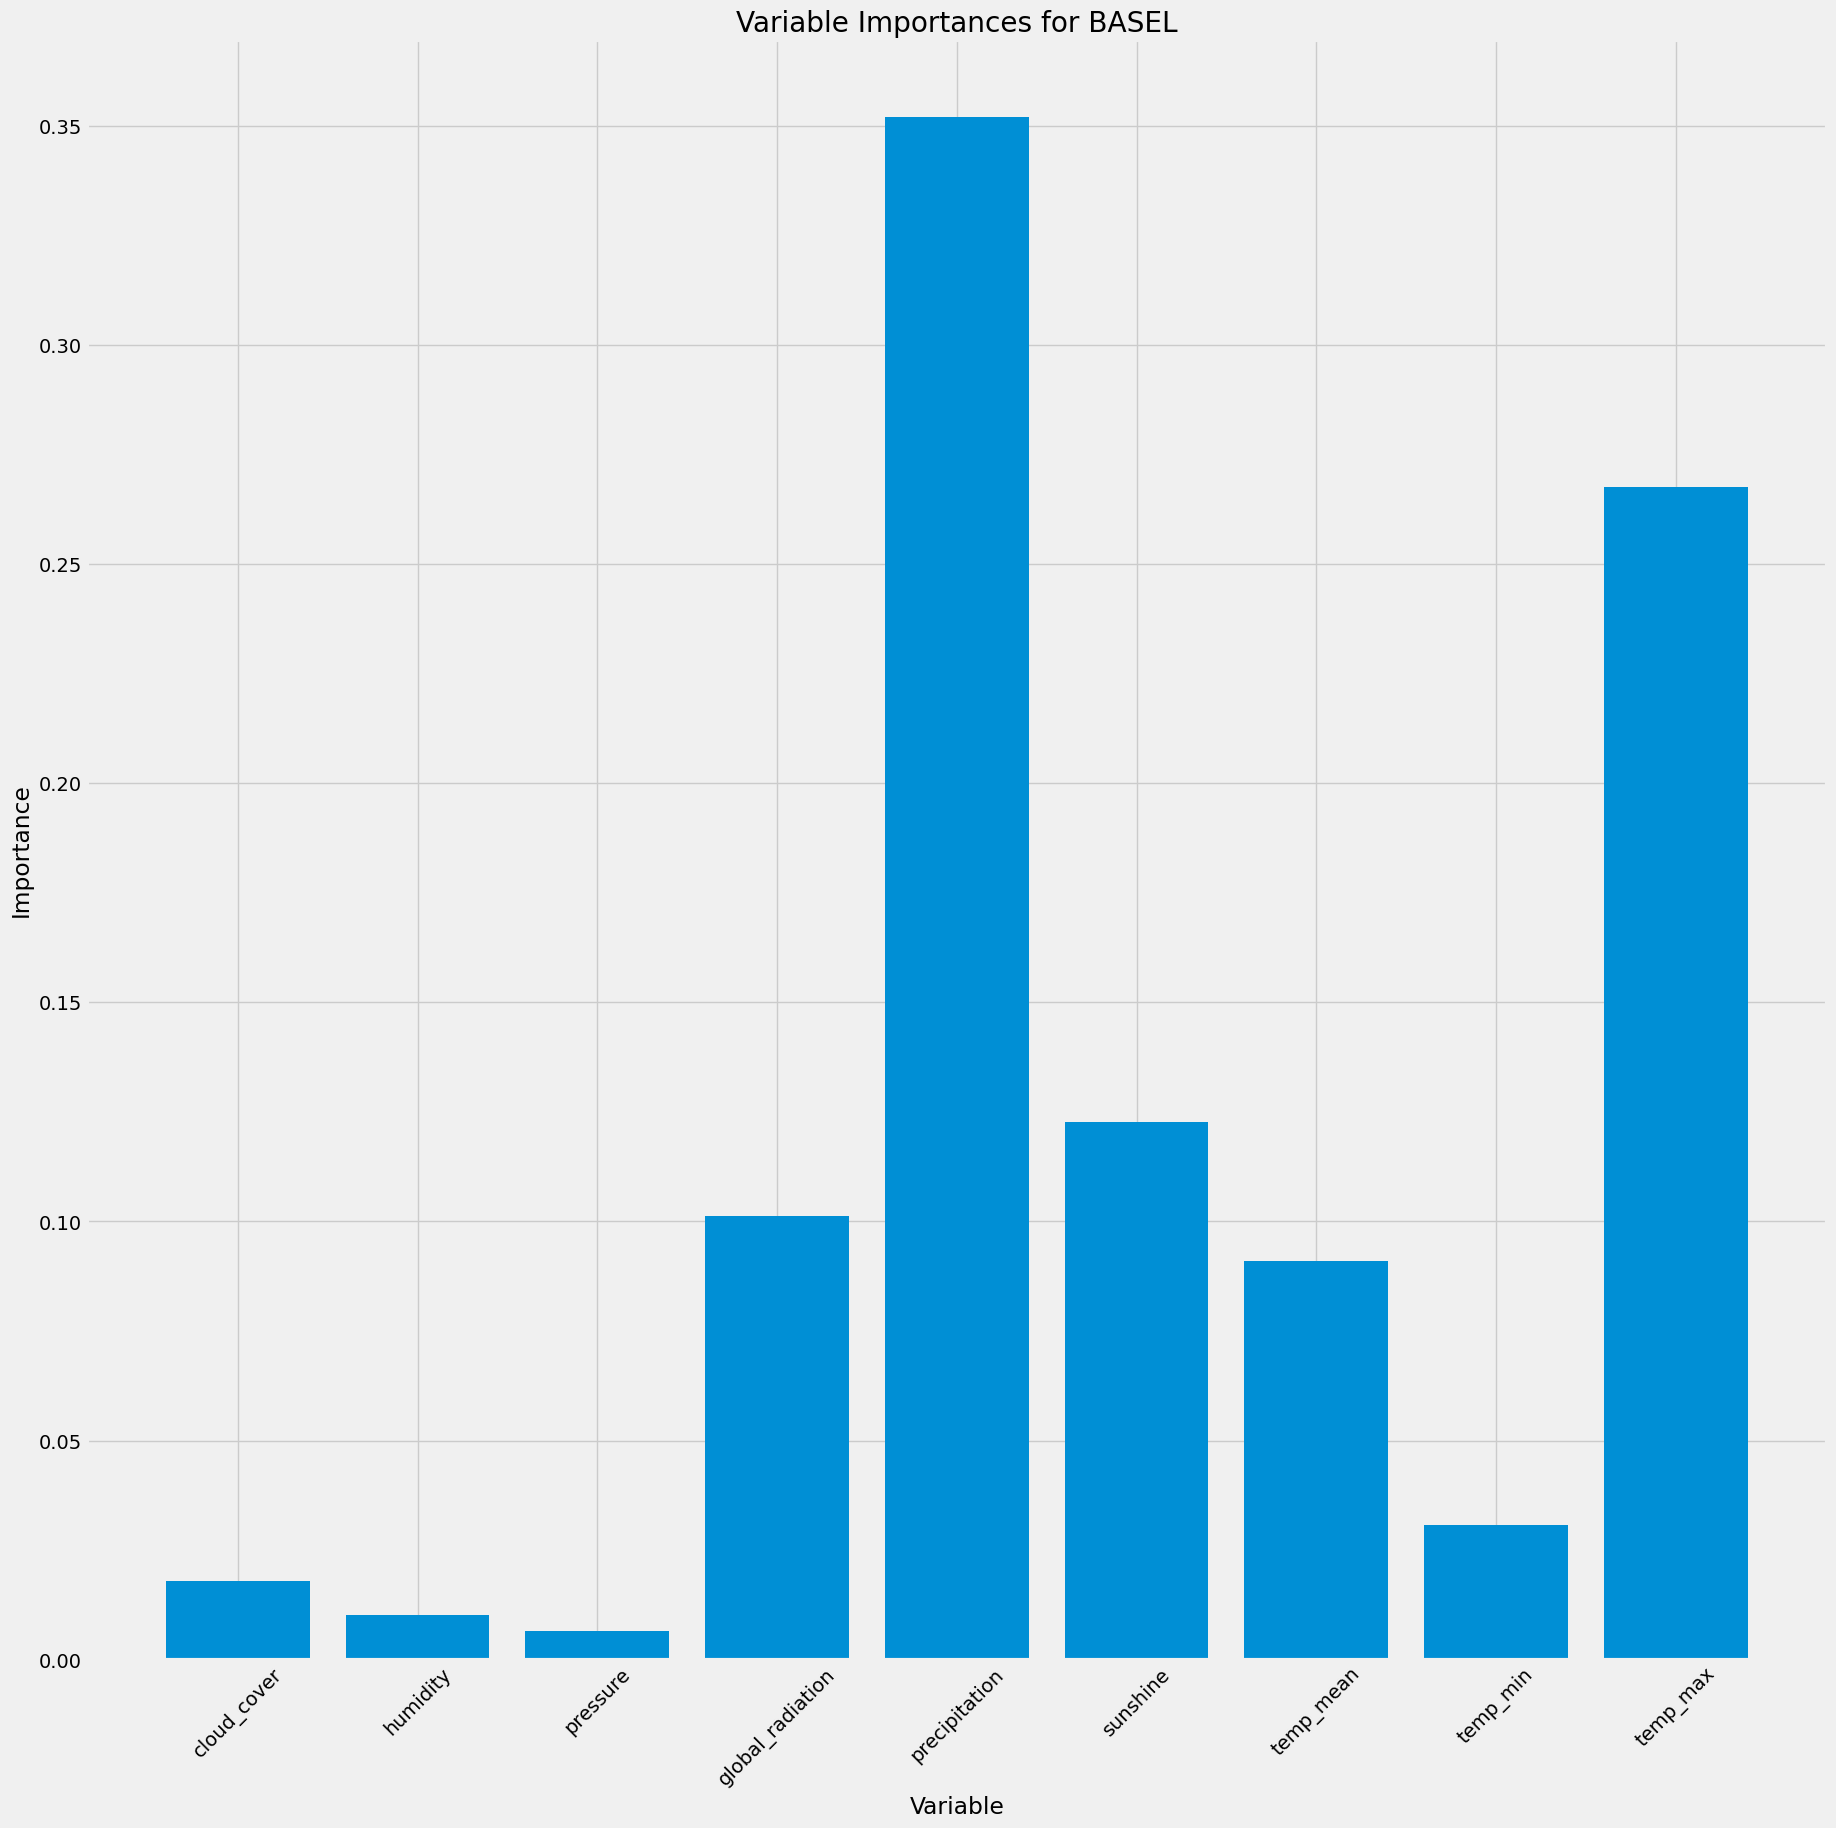

In [44]:
station = "BASEL"
station_columns = [col for col in df.columns if col.startswith(station)]
if 'target' in df.columns:
    station_columns.append('target')

station_data = df[station_columns]

X_station = station_data.iloc[:, :-1]
y_station = station_data.iloc[:, -1]

X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)

clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_station.fit(X_train_station, y_train_station)

plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(clf_station.feature_importances_)))

plt.bar(x_values, clf_station.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, attributes, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for BASEL');

#accuracy for the DUSSELDORF station model
y_pred_station = clf_station.predict(X_test_station)
print(f"Model Accuracy for {station}: ", metrics.accuracy_score(y_test_station, y_pred_station))

Model Accuracy for MAASTRICHT:  1.0


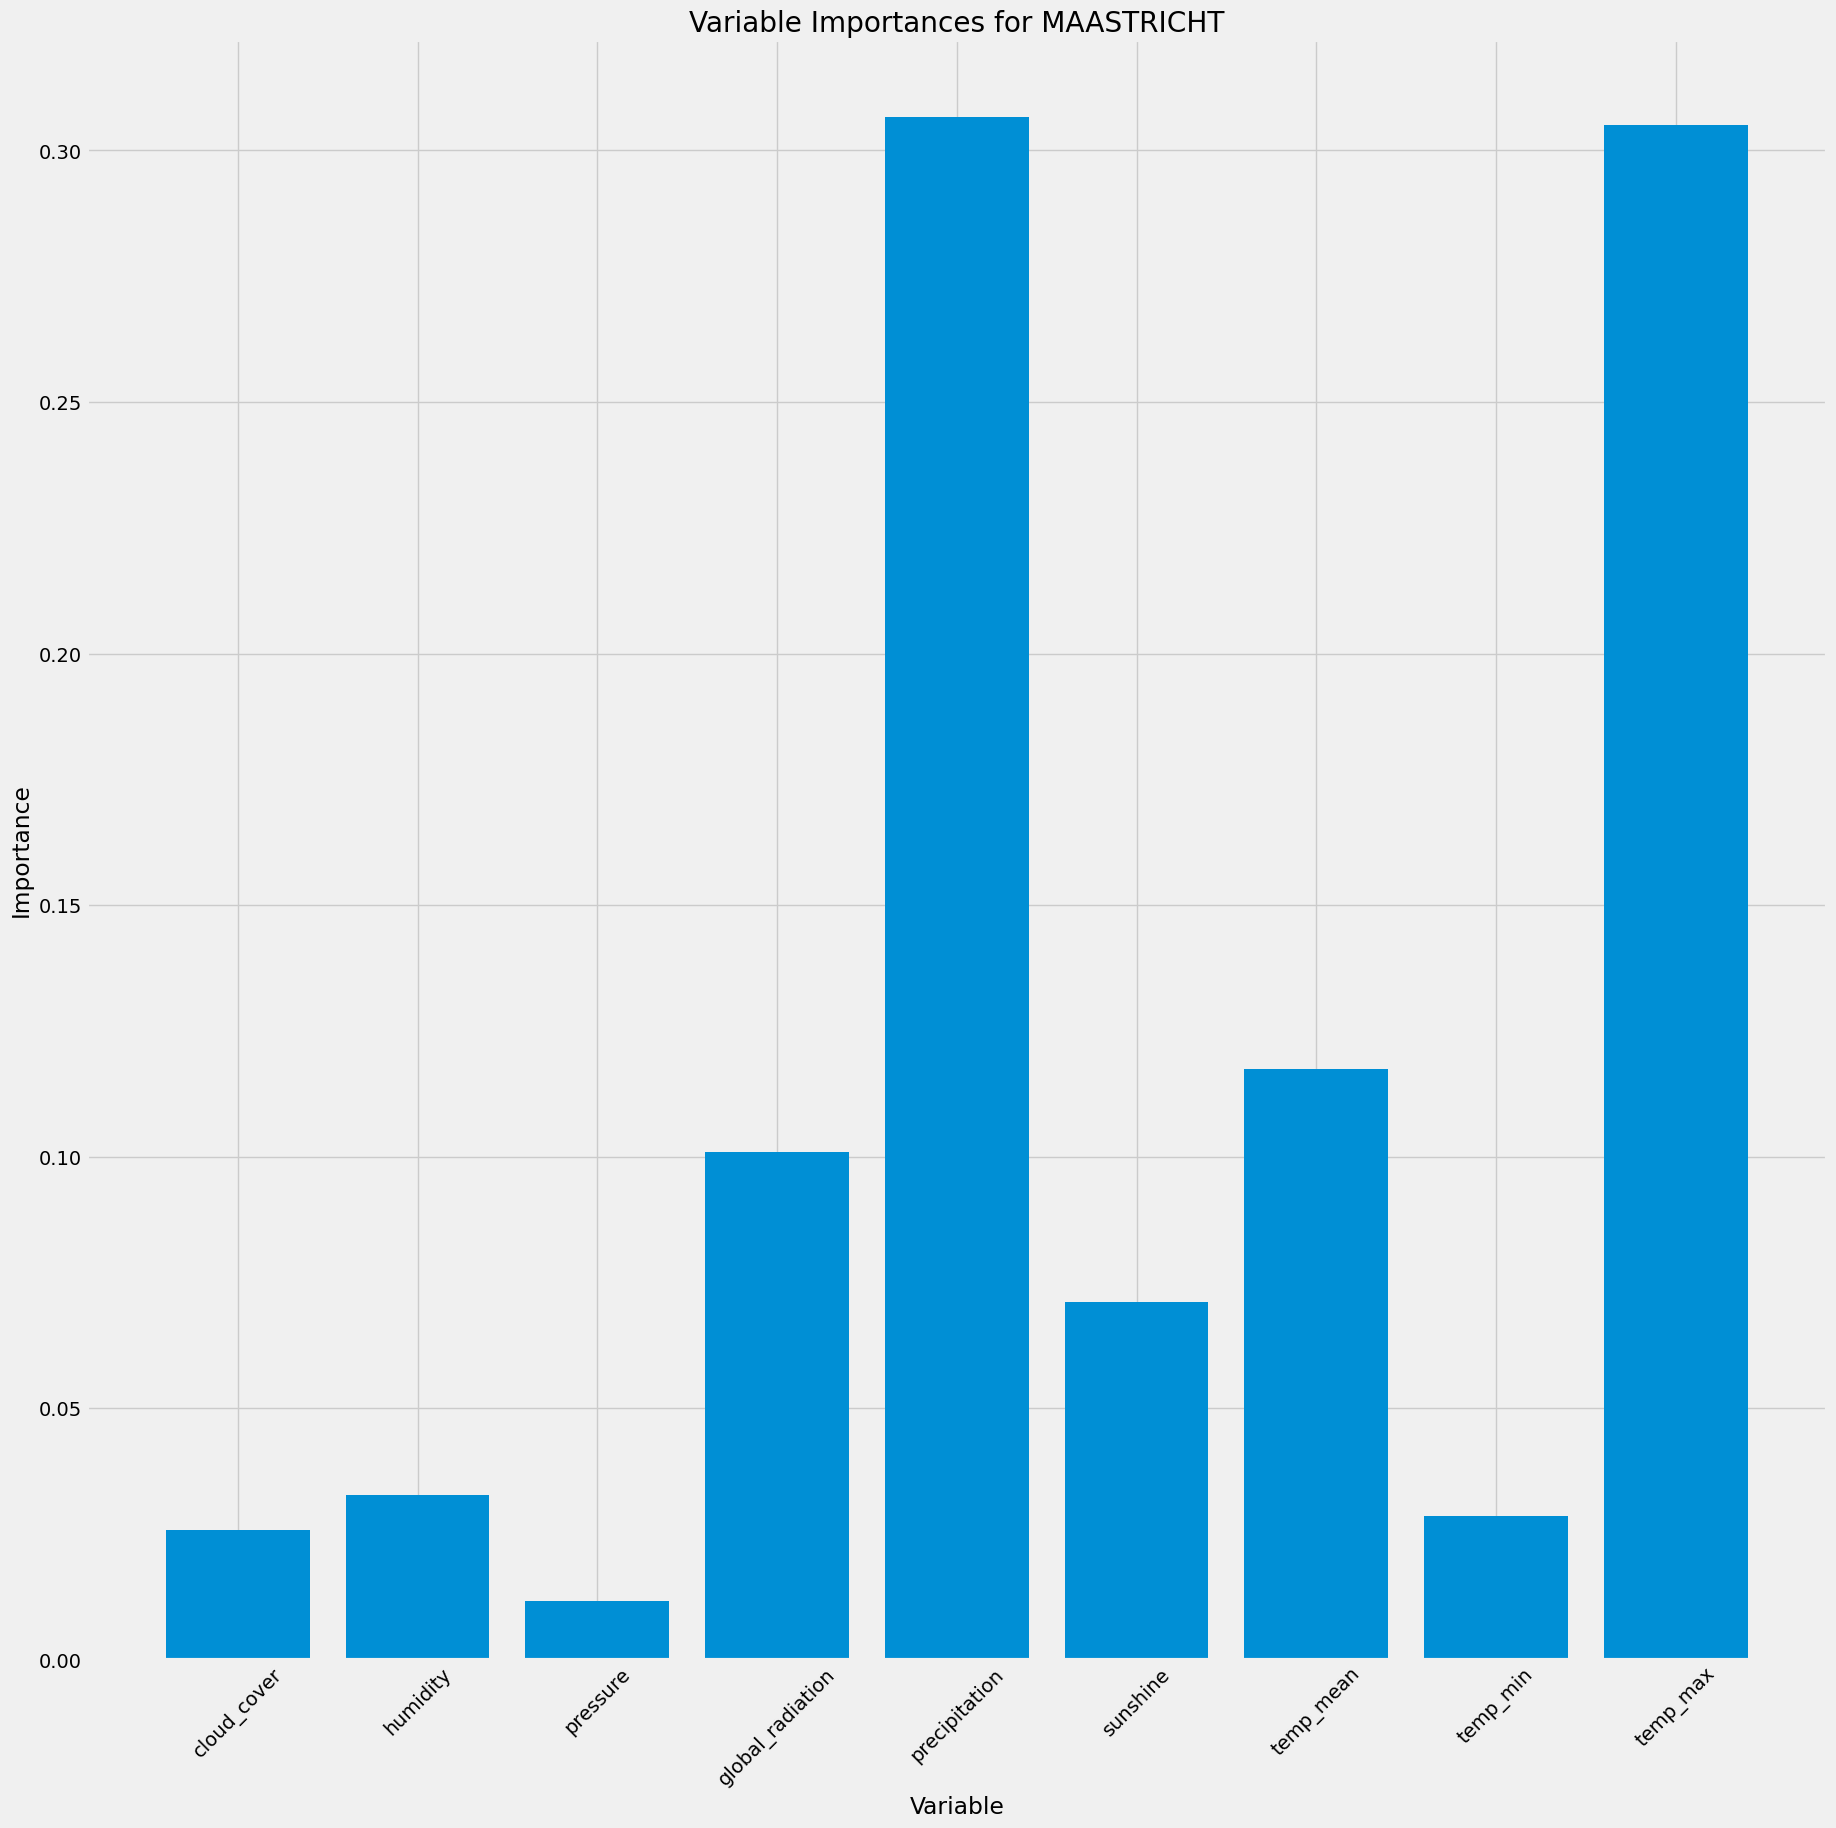

In [43]:
station = "MAASTRICHT"
station_columns = [col for col in df.columns if col.startswith(station)]
if 'target' in df.columns:
    station_columns.append('target')

station_data = df[station_columns]

X_station = station_data.iloc[:, :-1]
y_station = station_data.iloc[:, -1]

X_train_station, X_test_station, y_train_station, y_test_station = train_test_split(X_station, y_station, test_size=0.3, random_state=42)

clf_station = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf_station.fit(X_train_station, y_train_station)

plt.figure(figsize=(20,20))
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(clf_station.feature_importances_)))

plt.bar(x_values, clf_station.feature_importances_, orientation = 'vertical')
plt.xticks(x_values, attributes, rotation=45)
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances for MAASTRICHT');

#accuracy for the DUSSELDORF station model
y_pred_station = clf_station.predict(X_test_station)
print(f"Model Accuracy for {station}: ", metrics.accuracy_score(y_test_station, y_pred_station))